In [8]:
from dataset import (
    get_dataset, 
    save_map, 
    save_pred_map_to_tif
)
from metrics import (
    get_metrics,
    get_classification_metrics,
    get_feature_importances, 
    get_catboost_importances, 
)
from vis import (
    plot_image,
    plot_mask,
    plot_SCL,
    draw_maps,
)

import matplotlib.pyplot as plt
from rasterio.windows import Window
import pandas as pd
import wandb
import rasterio
import numpy as np
import tifffile as tiff
import wandb
from sklearn.model_selection import train_test_split

import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio import features
from rasterio.enums import MergeAlg
from rasterio.plot import show
from numpy import int16
import numpy as np
from pathlib import Path

%load_ext autoreload
%autoreload 2   

/beegfs/home/alina.smolina/forest-co2/dataset.py:10: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [2]:
volume_path = Path('./data/tile_UTM38N/rasterized/volume.tif')
height_path = Path('./data/tile_UTM38N/rasterized/height.tif')
raster_path = Path('./data/tile_UTM38N/rasterized/volume.tif')

In [3]:
raster = rasterio.open(raster_path)
print(f'raster CRS: {raster.crs}')
print(f'raster resolution: {raster.res}')
print(f'raster shape: {raster.shape}')

raster CRS: EPSG:32638
raster resolution: (9.998462880618687, 10.000324767245015)
raster shape: (9452, 10345)


In [4]:
with rasterio.open(volume_path) as src:
    volume = src.read(1)
    
with rasterio.open(height_path) as src:
    height = src.read(1)

In [5]:
basal_area = np.where(volume > 0, volume / height, -1)

(<Figure size 988.8x604.8 with 2 Axes>,
 <AxesSubplot:>,
 <matplotlib.image.AxesImage at 0x1554cf9428d0>)

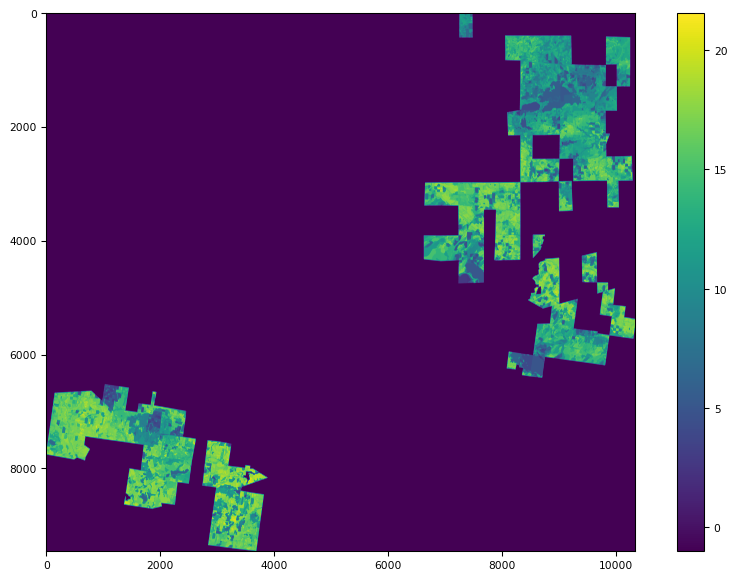

In [9]:
tiff.imshow(basal_area)

In [10]:
basal_area_path = Path('./data/tile_UTM38N/rasterized/basal_area.tif')

In [11]:
basal_area.dtype

dtype('float32')

In [12]:
with rasterio.open(
        basal_area_path, "w",
        driver = "GTiff",
        crs = raster.crs,
        transform = raster.transform,
        dtype = basal_area.dtype,
        count = 1,
        width = raster.width,
        height = raster.height) as dst:
    
    dst.write(basal_area, indexes = 1)

In [15]:
# !rm ./data/tile_UTM38N/20180730/basal_area.tif 
# !rm ./data/tile_UTM38N/20180804/basal_area.tif 
# !rm ./data/tile_UTM38N/20180827/basal_area.tif 
# !rm ./data/tile_UTM38N/20180911/basal_area.tif 
# !rm ./data/tile_UTM38N/20190608/basal_area.tif 
# !rm ./data/tile_UTM38N/20190613/basal_area.tif 
# !rm ./data/tile_UTM38N/20200604/basal_area.tif 
# !rm ./data/tile_UTM38N/20200709/basal_area.tif 

rm: cannot remove ‘./data/tile_UTM38N/20180730/basal_area.tif’: No such file or directory


In [16]:
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20180730
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20180804/
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20180827/
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20180911/
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20190608/
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20190613/
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20200604/
# !ln -s ./data/tile_UTM38N/rasterized/basal_area.tif ./data/tile_UTM38N/20200709/